# Analysis on salary of Kaggle 2020 survey
## by Baiyan Ren 

## Investigation Overview

> Understand the salary of data science and machine learning practitioners.

## Dataset Overview

> This dataset is the annual survey of Kaggle on data science and machine learning in 2020. It collects the information of prectitioners in a comprehensive way, from age, gender to prefered machine learning tools.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
cmap = sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

In [3]:
# load in the dataset into a pandas dataframe
survey_2020 = pd.read_csv('kaggle_survey_2020_responses.csv', low_memory=False, skiprows=[1])

columns = {'Q1': 'Age', 
           'Q2': 'Gender', 
           'Q3': 'Country', 
           'Q4': 'Education', 
           'Q5': 'Title', 
           'Q6': 'Coding_exp', 
           'Q8': 'Recommended_language', 
           'Q15': 'ML_exp',
           'Q20': 'Company_size', 
           'Q24': 'Salary'}
survey_2020.rename(columns=columns, inplace=True)

Education = ['No formal education past high school', 
             'Some college/university study without earning a bachelor’s degree', 
             'Bachelor’s degree', 
             'Master’s degree', 
             'Doctoral degree', 
             'Professional degree',
             'I prefer not to answer']
edu = pd.api.types.CategoricalDtype(categories=Education, ordered=True)
survey_2020['Education'] = survey_2020['Education'].astype(edu)

coding = ['I have never written code', 
          '< 1 years', 
          '1-2 years', 
          '3-5 years', 
          '5-10 years', 
          '10-20 years', 
          '20+ years']
cod = pd.api.types.CategoricalDtype(categories=coding, ordered=True)
survey_2020['Coding_exp'] = survey_2020['Coding_exp'].astype(cod)

survey_2020_doct = survey_2020.query('Education == "Doctoral degree"').copy()
survey_2020_bs = survey_2020.query('Education == "Bachelor’s degree"').copy()
survey_2020_ms = survey_2020.query('Education == "Master’s degree"').copy()



salary = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', 
          '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
          '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999',
          '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']
salary_total = survey_2020.groupby('Salary').size()[salary]
salary_prop_total = salary_total/salary_total.sum()*100

coding_bs = survey_2020_bs.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)
coding_ms = survey_2020_ms.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)
coding_doct = survey_2020_doct.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)

edu_count = survey_2020.groupby('Education').size()
total = edu_count.sum()
edu_prop = edu_count/total*100

coding = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
coding_count = survey_2020.groupby('Coding_exp').size()[coding]
coding_prop = coding_count/coding_count.sum()*100

coding_salary = survey_2020.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)
coding_edu = survey_2020.groupby(['Coding_exp', 'Education']).size().unstack().reindex(coding[::-1]).fillna(0).astype(int)

## (Visualization 1)

> Majority of the respondents have annual salary lower than \\$1000, which is uncommon in US. The reason might be that this is collected from worldwide, the salary is different in developed and developing country.

> The most common education level is Bachelor and Master's degree.

> Most of the respondents have 1-5 years coding experience.

Next, I'll explore the relationship of these variables.

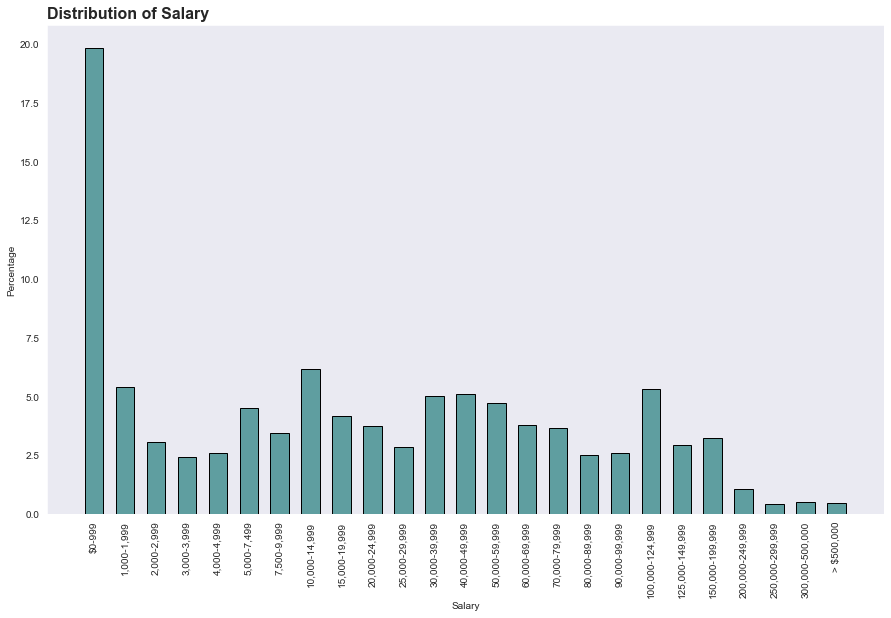

In [4]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])
ax.bar(salary_total.index, salary_prop_total, color='cadetblue', edgecolor=(0, 0, 0), width=0.6, label='All')



plt.xticks(rotation=90)
plt.xlabel('Salary')
plt.ylabel('Percentage')
plt.title('Distribution of Salary', fontsize=16, fontweight='bold', loc='left');

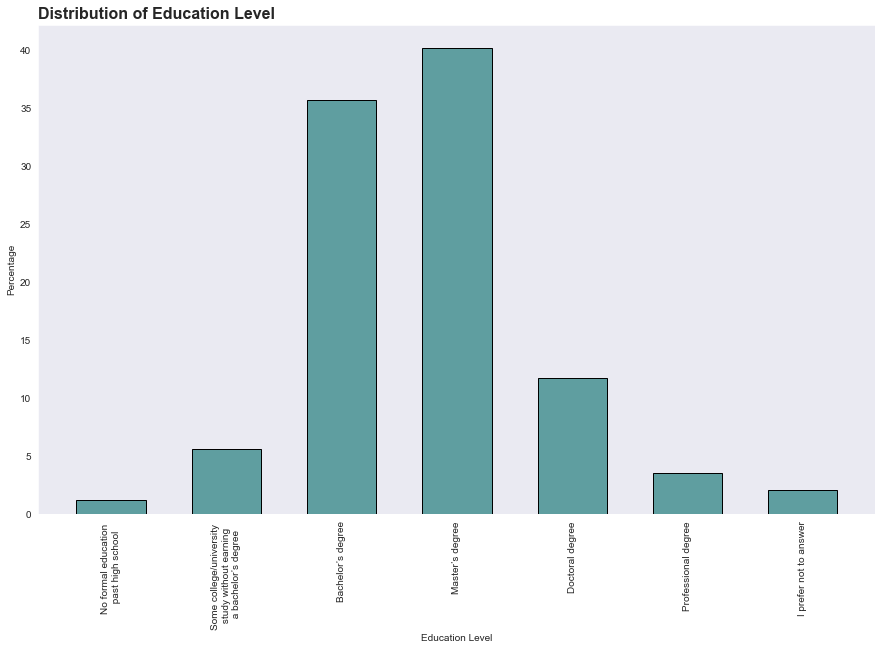

In [8]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])
ax.bar(edu_prop.index, edu_prop, color='cadetblue', edgecolor=(0, 0, 0), width=0.6, label='All')

edu_label = ['No formal education \n past high school', 
             'Some college/university \n study without earning \n a bachelor’s degree', 
             'Bachelor’s degree', 
             'Master’s degree', 
             'Doctoral degree', 
             'Professional degree',
             'I prefer not to answer']

locs, labels = plt.xticks()
plt.xticks(rotation=90, ticks = locs, labels=edu_label)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Distribution of Education Level', fontsize=16, fontweight='bold', loc='left');

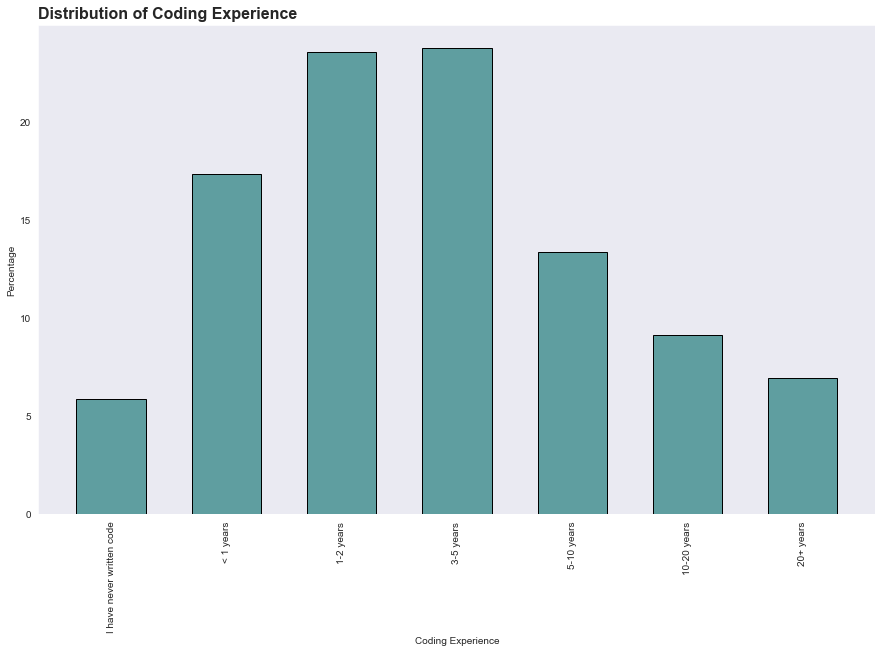

In [7]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])
ax.bar(coding_prop.index, coding_prop, color='cadetblue', edgecolor=(0, 0, 0), width=0.6, label='All')
plt.xticks(rotation=90)
plt.xlabel('Coding Experience')
plt.ylabel('Percentage')
plt.title('Distribution of Coding Experience', fontsize=16, fontweight='bold', loc='left');

## (Visualization 2)

> Although most of the respondents have salary lower than \\$1000, there is a positive correlation between salary and coding experience.

> Coding experience increases with education level.

> The interesting part is, the period of time to complete the survey is different among education levels.

Next, I'll explore further into these variables.

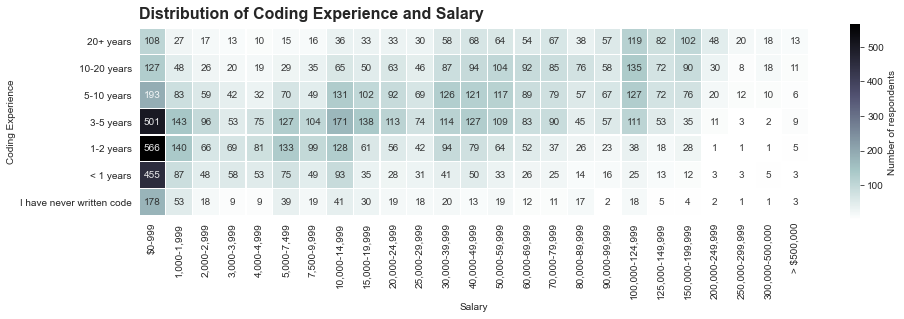

In [8]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])

sns.heatmap(data=coding_salary,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.4, 'label': 'Number of respondents'})
plt.xlabel('Salary')

plt.ylabel('Coding Experience')

plt.title('Distribution of Coding Experience and Salary', fontsize=16, fontweight='bold', loc='left', va='bottom');

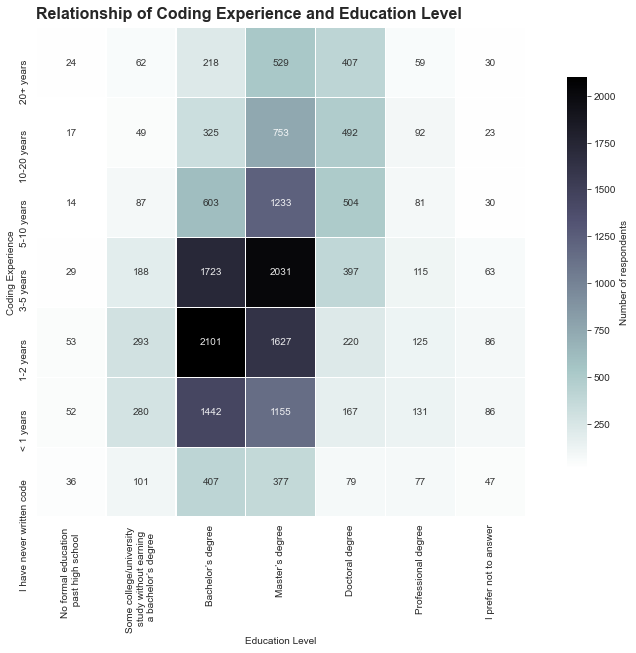

In [9]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])

sns.heatmap(data=coding_edu,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.8, 'label': 'Number of respondents'})
locs, labels = plt.xticks()
plt.xticks(rotation=90, ticks = locs, labels=edu_label)
plt.xlabel('Education Level')

plt.ylabel('Coding Experience')

plt.title('Relationship of Coding Experience and Education Level', fontsize=16, fontweight='bold', loc='left', va='bottom');

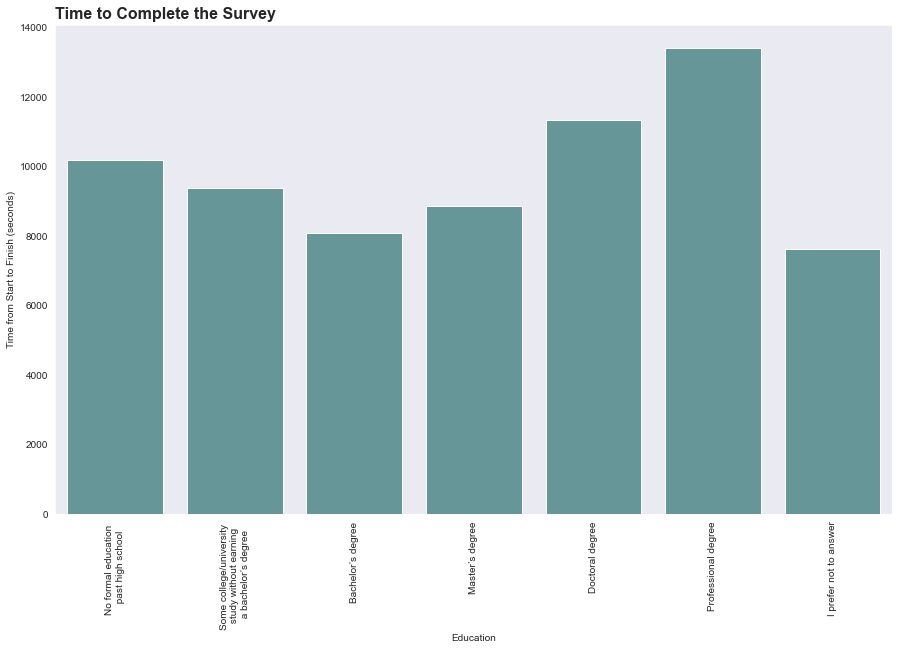

In [10]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])
sns.barplot(data=survey_2020, x='Education', y='Time from Start to Finish (seconds)', ci=None, color='cadetblue')
locs, labels = plt.xticks()
plt.xticks(rotation=90, ticks = locs, labels=edu_label)

plt.xlabel('Education')
plt.title('Time to Complete the Survey', fontsize=16, fontweight='bold', loc='left');

## (Visualization 3)

>  There is positive correlation between salary and coding experience in all three education levels. In addition, with the same coding experience, the salary of respondents with doctoral degree is higher than those with Master's degree and Bachelor's degree.

> For the time to complete the survey, there are differences among education level, gender and coding experience.

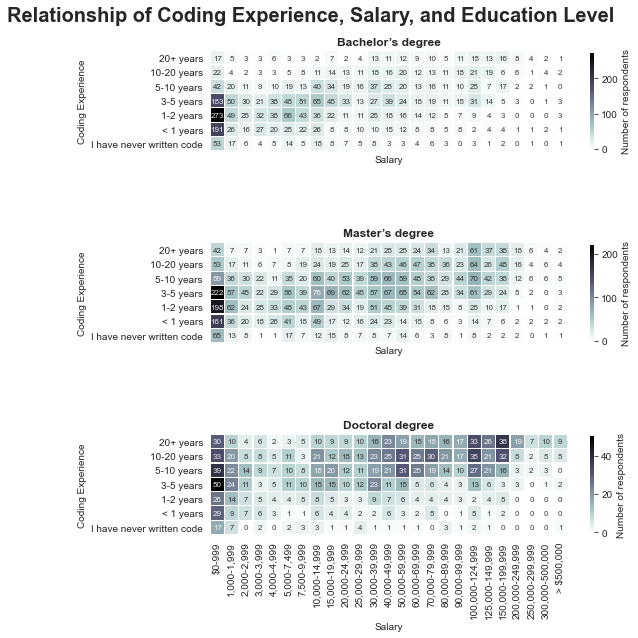

In [13]:
fig, axes = plt.subplots(3, 1, figsize=[8, 10], sharex=True, sharey=True)

ax1 = sns.heatmap(data=coding_bs,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9, 'fontsize': 8},
                  cbar_kws={'shrink': 0.6, 'label': 'Number of respondents'},
                  ax=axes[0],
                  label='Bachelor’s degree')
ax2 = sns.heatmap(data=coding_ms,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9, 'fontsize': 8},
                  cbar_kws={'shrink': 0.6, 'label': 'Number of respondents'},
                  ax=axes[1],
                  label='Master’s degree')
ax3 = sns.heatmap(data=coding_doct,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9, 'fontsize': 8},
                  cbar_kws={'shrink': 0.6, 'label': 'Number of respondents'},
                  ax=axes[2],
                  label='Doctoral degree')
fontdict={'fontsize': 12,
          'fontweight': 'bold'}
ax1.set_title('Bachelor’s degree', fontdict=fontdict)
ax2.set_title('Master’s degree', fontdict=fontdict)
ax3.set_title('Doctoral degree', fontdict=fontdict)
for ax in [ax1, ax2, ax3]:
    ax.set_ylabel('Coding Experience')

fig.suptitle('Relationship of Coding Experience, Salary, and Education Level', x=0.3, y=0.9, size=20, weight='bold');

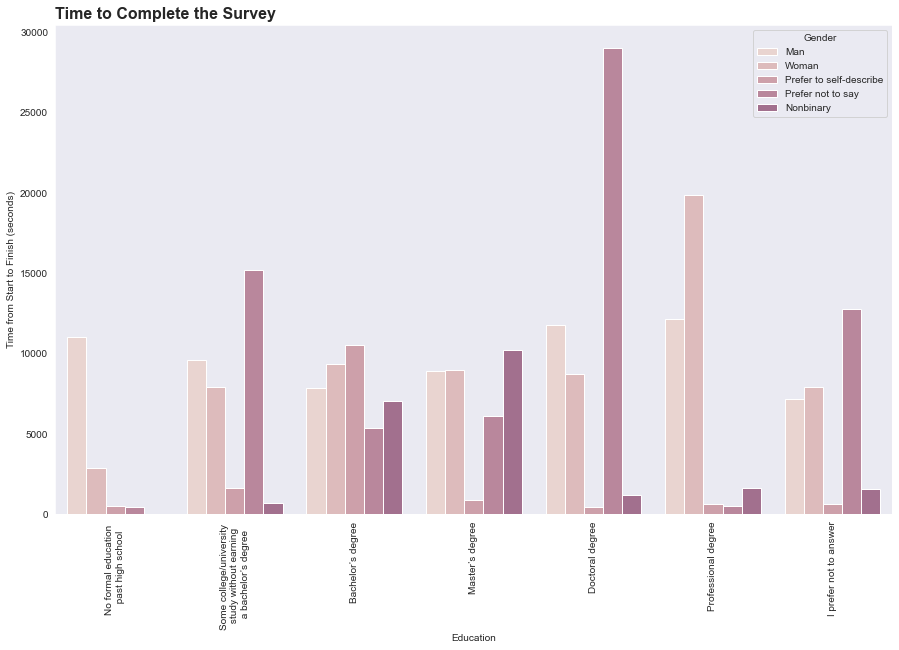

In [14]:
fig, ax = plt.subplots(figsize=[15, 9])
sns.barplot(data=survey_2020, x='Education', y='Time from Start to Finish (seconds)', hue='Gender', ci=None, palette=cmap)
locs, labels = plt.xticks()
plt.xticks(rotation=90, ticks = locs, labels=edu_label)
plt.xlabel('Education')
plt.title('Time to Complete the Survey', fontsize=16, fontweight='bold', loc='left');

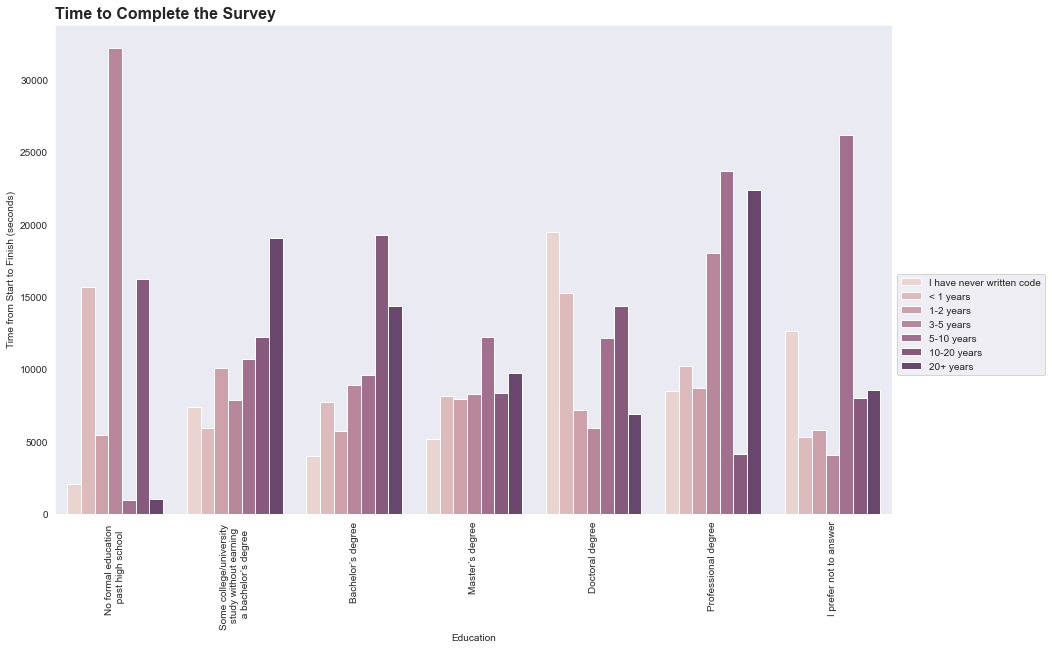

In [15]:
fig, ax = plt.subplots(figsize=[15, 9])
sns.barplot(data=survey_2020, x='Education', y='Time from Start to Finish (seconds)', hue='Coding_exp', ci=None, palette=cmap)
locs, labels = plt.xticks()
plt.xticks(rotation=90, ticks = locs, labels=edu_label)
plt.xlabel('Education')
plt.legend(bbox_to_anchor=[1, 0.5, 0, 0])
plt.title('Time to Complete the Survey', fontsize=16, fontweight='bold', loc='left');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!